In [98]:
import pandas as pd


In [99]:
wine = pd.read_csv('wine_quality_red_preprocessed.csv')

In [100]:
wine = wine.drop(["Unnamed: 0"], axis=1)
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.66         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

Проверка на наличие выбросов.

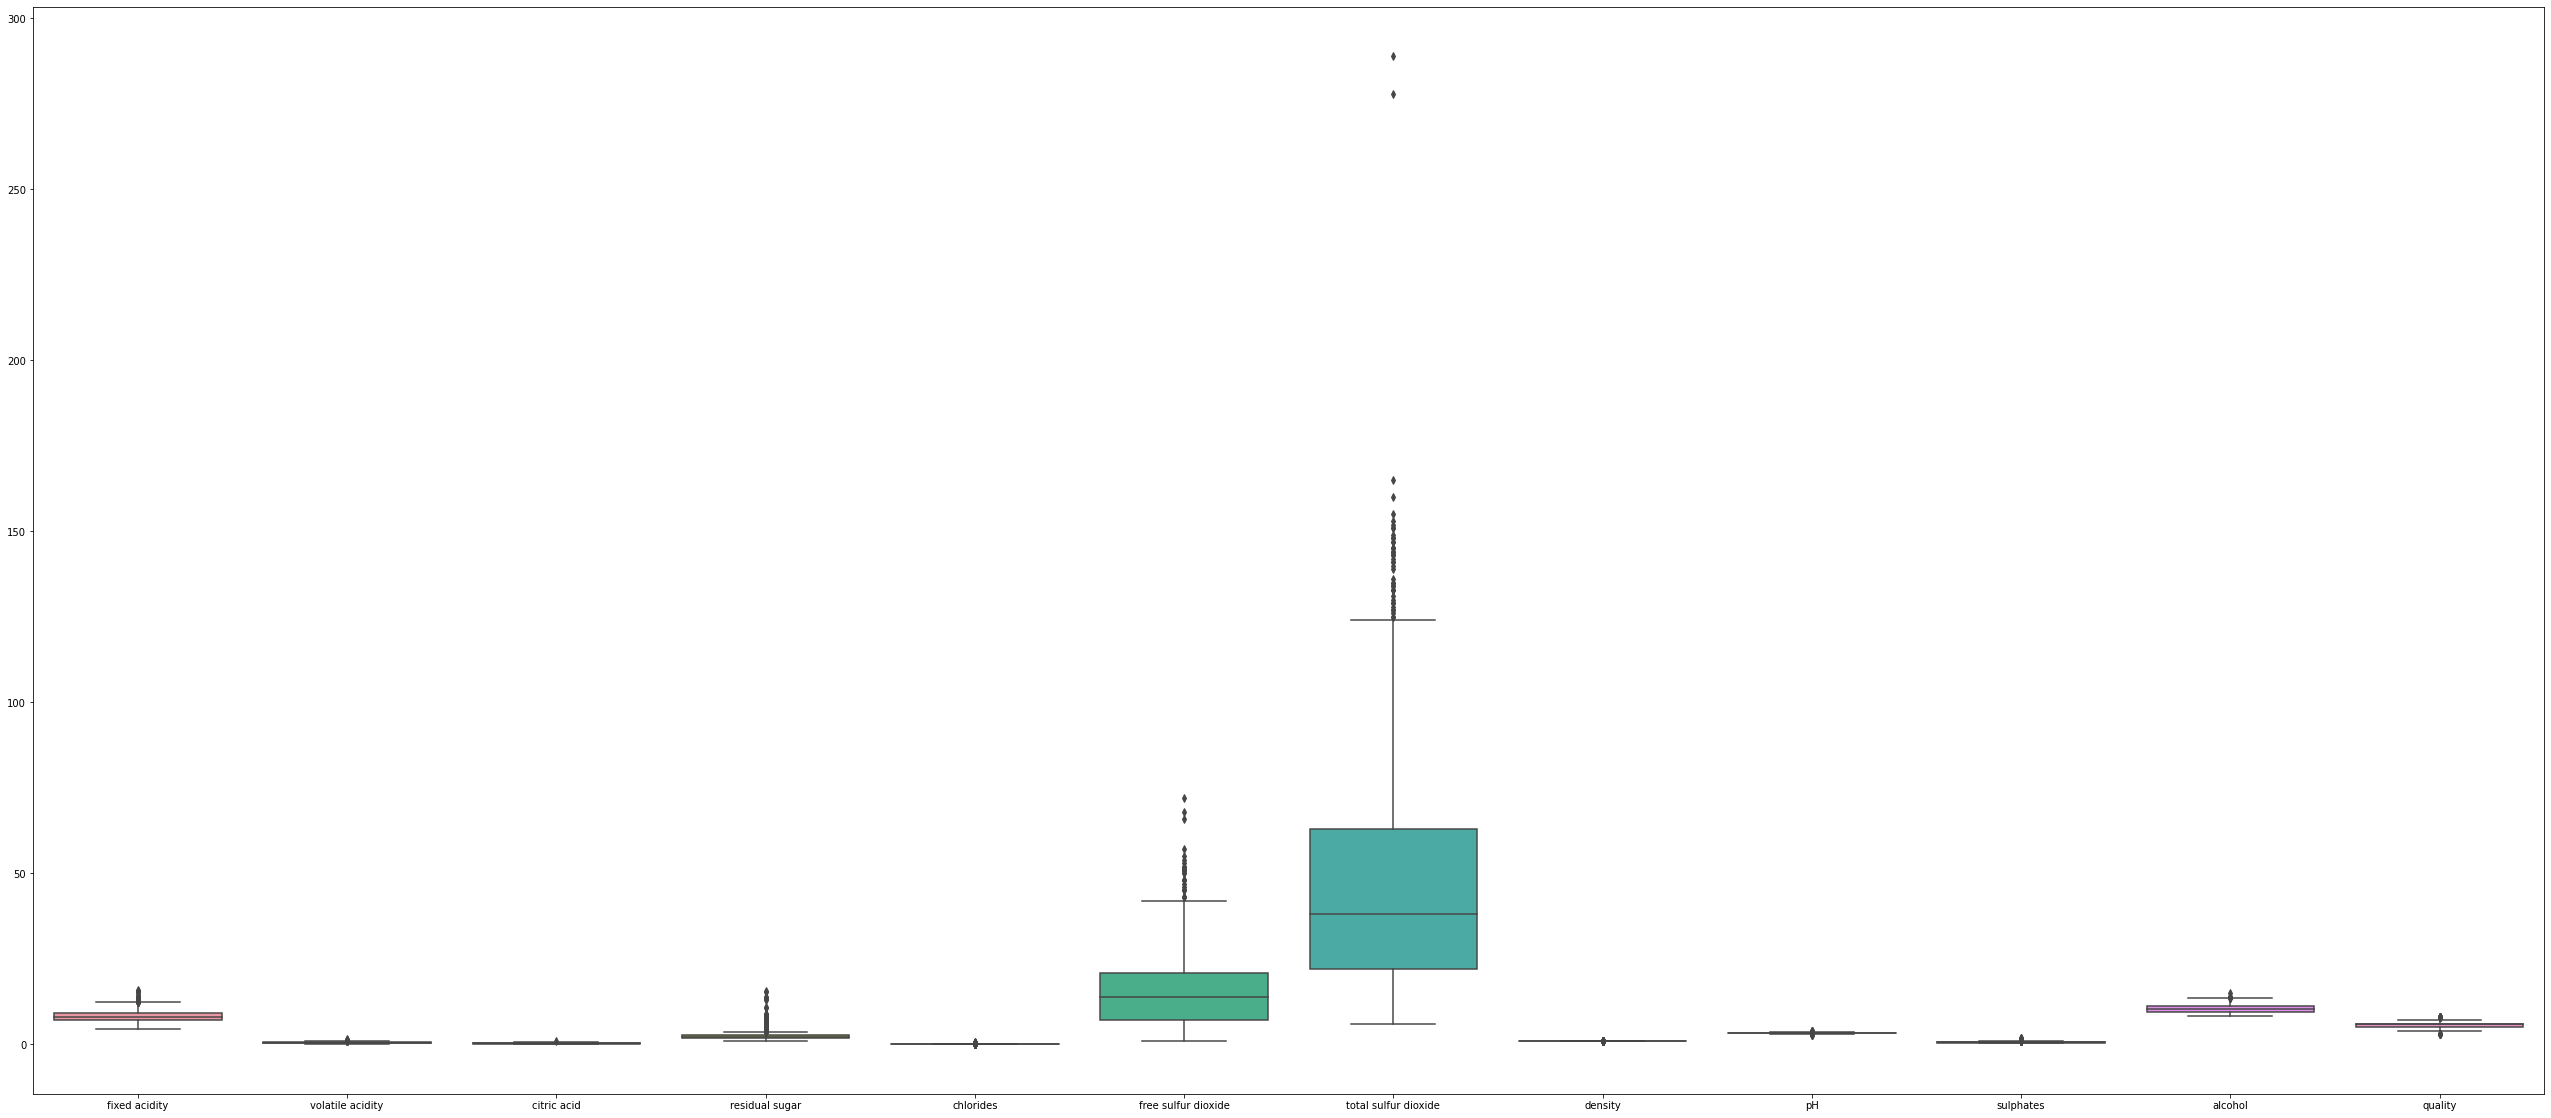

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(45,20))
sns.boxplot(data=wine)

Удаление выбросов

In [102]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
wine = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
wine.shape

(1005, 12)

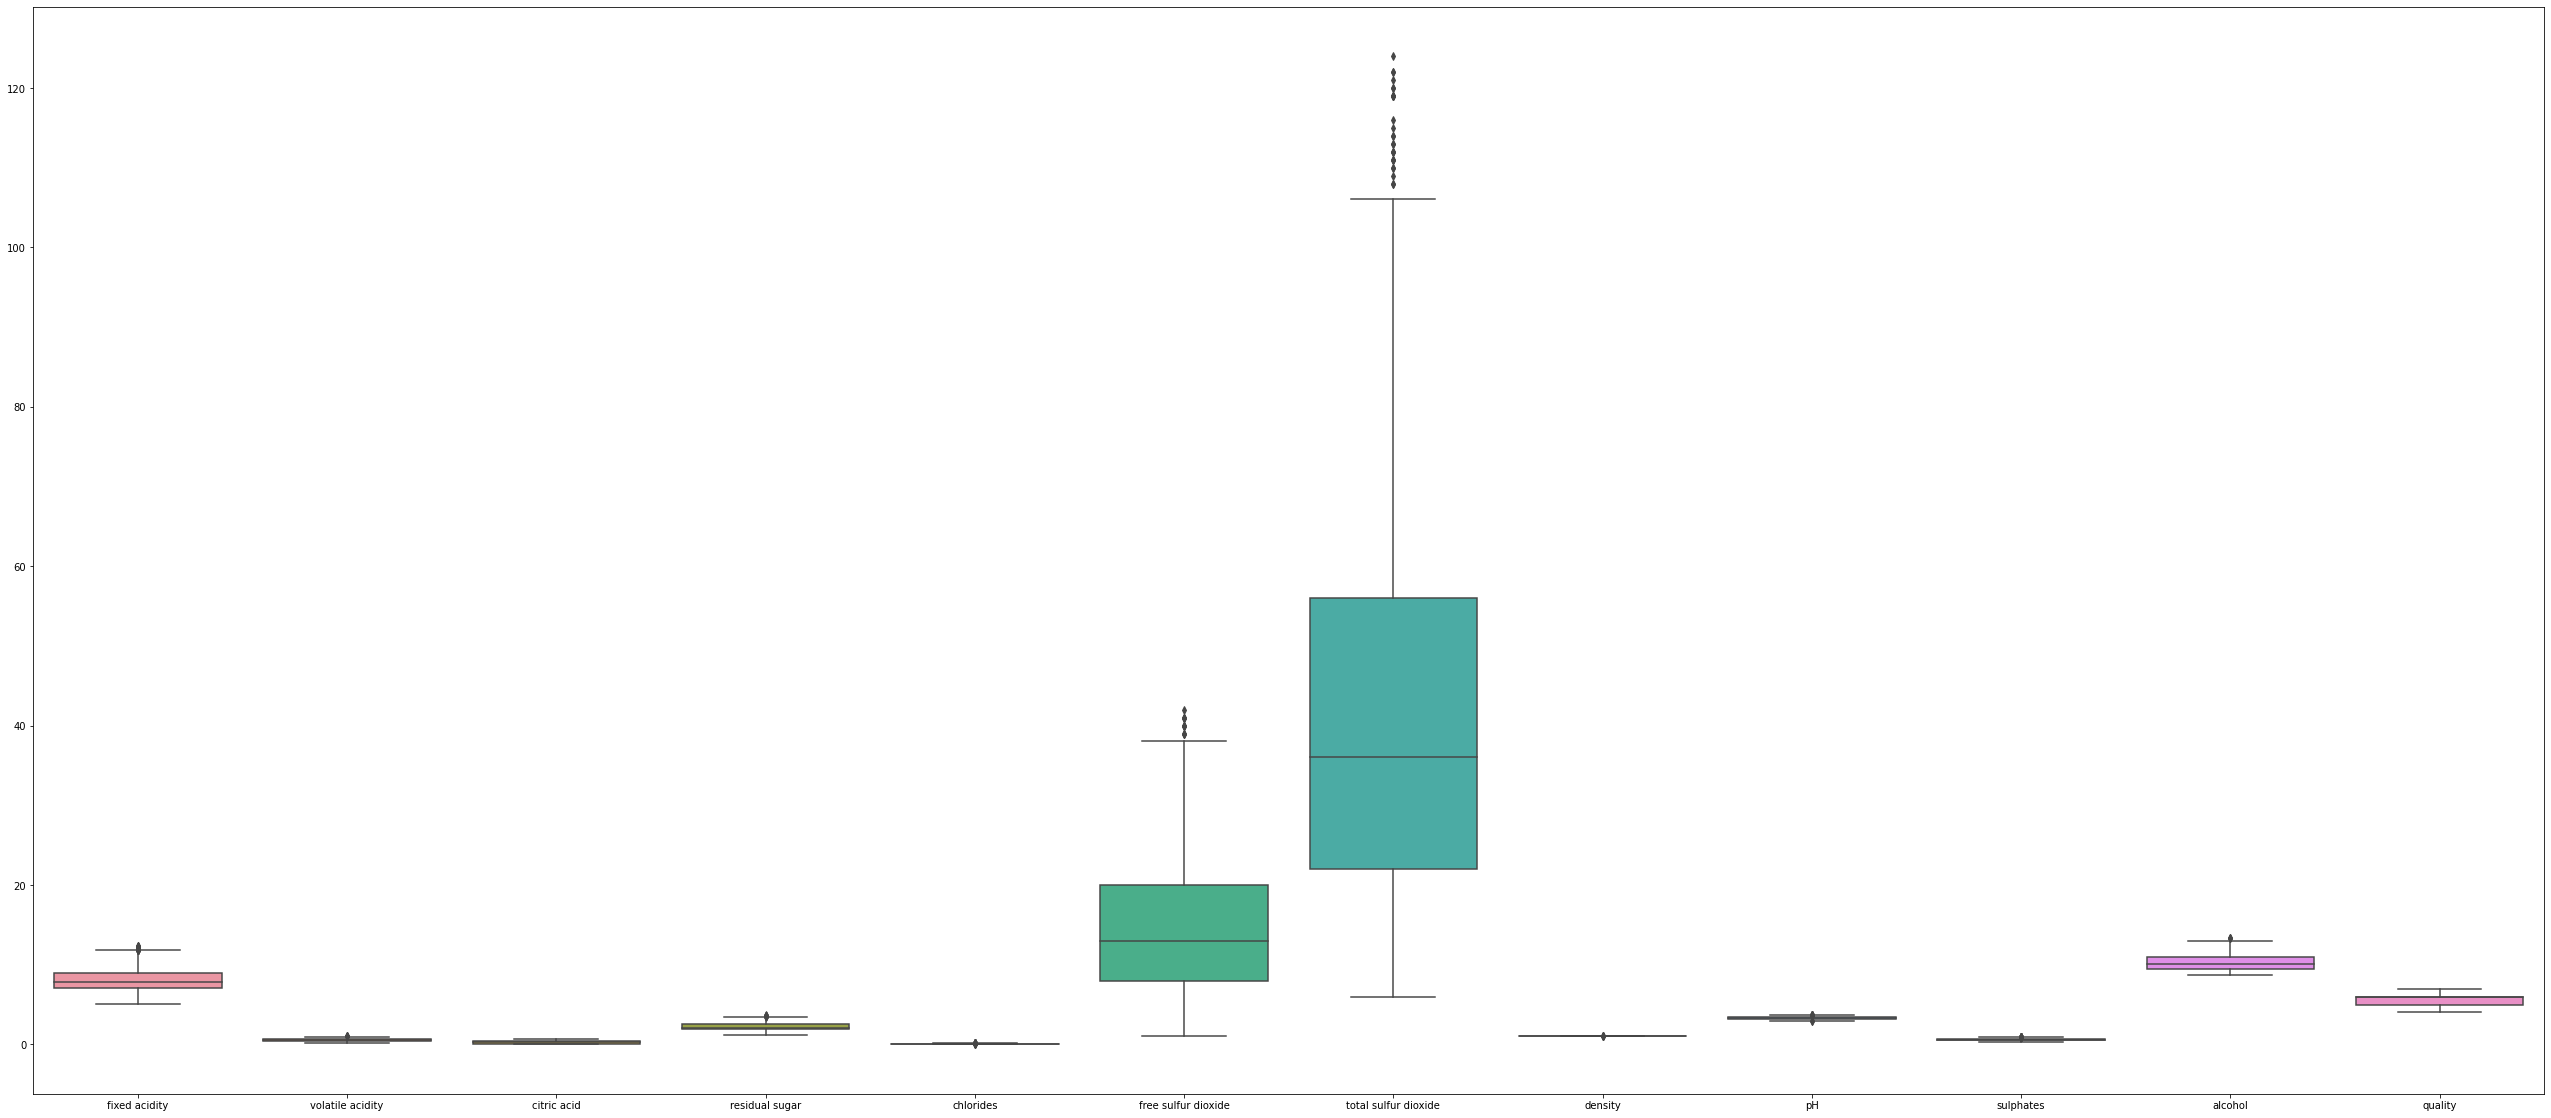

In [103]:
plt.figure(figsize=(45,20))
sns.boxplot(data=wine)

В зависимости от качества вина, разделим их на "хорошие" и "плохие". Если качество больше или равно 7,то вино считается хорошим,если нет,то плохим.

In [104]:
wine['quality'] = ['good' if i>=7 else 'bad' for i in wine['quality']]
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4      bad
1            7.8              0.88         0.00  ...       0.68      9.8      bad
2            7.8              0.76         0.04  ...       0.65      9.8      bad
3           11.2              0.28         0.56  ...       0.58      9.8      bad
4            7.4              0.66         0.00  ...       0.56      9.4      bad

[5 rows x 12 columns]

In [105]:
X = wine.iloc[:, :-1].values
y = wine.iloc[:,-1 :].values

In [106]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Разделение выборки

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Метод k-ближайших соседей (K-Nearest Neighbors)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[166  10]
 [ 18   7]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       176
           1       0.41      0.28      0.33        25

    accuracy                           0.86       201
   macro avg       0.66      0.61      0.63       201
weighted avg       0.84      0.86      0.85       201



Подбор гиперпараметров

In [111]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[5, 6, 7, 8, 9, 10], 'leaf_size':[1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.best_params_

{'leaf_size': 1, 'n_neighbors': 6}

Применим гиперпараметры и посмотрим на результат

In [112]:
clf = KNeighborsClassifier(n_neighbors=6, leaf_size=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171   5]
 [ 19   6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       176
           1       0.55      0.24      0.33        25

    accuracy                           0.88       201
   macro avg       0.72      0.61      0.63       201
weighted avg       0.86      0.88      0.86       201



После применения гиперпараметров точность увеличилась

# Классификатор дерева решений (Decision Tree Classifier)

In [113]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [114]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[164  12]
 [ 18   7]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       176
           1       0.37      0.28      0.32        25

    accuracy                           0.85       201
   macro avg       0.63      0.61      0.62       201
weighted avg       0.83      0.85      0.84       201



Подбор гиперпараметров

In [115]:
parameters = {'splitter':['best', 'random'], 'min_samples_leaf':[1, 2, 3, 4, 5]}
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'min_samples_leaf': 5, 'splitter': 'random'}

In [116]:
clf = tree.DecisionTreeClassifier(splitter="random", min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169   7]
 [ 19   6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       176
           1       0.46      0.24      0.32        25

    accuracy                           0.87       201
   macro avg       0.68      0.60      0.62       201
weighted avg       0.84      0.87      0.85       201



После применения гиперпараметров точность работы модели увеличилась

# Наивный байесовский классификатор (Naive Bayes)

In [117]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154  22]
 [ 11  14]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       176
           1       0.39      0.56      0.46        25

    accuracy                           0.84       201
   macro avg       0.66      0.72      0.68       201
weighted avg       0.87      0.84      0.85       201



# Метод опорных векторов (Support Vector Machines)

In [119]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176   0]
 [ 21   4]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       176
           1       1.00      0.16      0.28        25

    accuracy                           0.90       201
   macro avg       0.95      0.58      0.61       201
weighted avg       0.91      0.90      0.86       201



# Логистическая регрессия (Logistic Regression)

In [121]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171   5]
 [ 20   5]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       176
           1       0.50      0.20      0.29        25

    accuracy                           0.88       201
   macro avg       0.70      0.59      0.61       201
weighted avg       0.85      0.88      0.85       201



In [123]:
parameters = {"penalty":['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


{'penalty': 'l2'}

In [124]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171   5]
 [ 20   5]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       176
           1       0.50      0.20      0.29        25

    accuracy                           0.88       201
   macro avg       0.70      0.59      0.61       201
weighted avg       0.85      0.88      0.85       201



Подбор гиперпараметров не дал улучшений точности работы модели 